In [79]:
from matplotlib import pyplot as plt
#%matplotlib inline
import seaborn as sns
from datetime import date

# Reading the data

In [80]:
import pandas as pd
dfb=pd.read_csv('Bronze.csv',sep=",",header=None)
# print(dfb.head(3))
dfg=pd.read_csv('Gold.csv',header=None)
# print(dfg.head(3))
dfp=pd.read_csv('Platinum.csv',header=None)
# print(dfp.head(3))
dfs=pd.read_csv('Silver.csv',header=None)
# print(dfs.head(3))
# dfa=pd.read_csv('Intel_ARK_ComparisonChart_2017_11_01.csv' ,header=None)
# print(dfa.head(3))

# Cleaning the data

In [81]:
# dfb=dfb.drop(dfb.columns[[0]], axis=1)  
# print(dfb.head(3))
# dfs=dfs.drop(dfs.columns[[0]], axis=1)  
# print(dfs.head(3))
# dfg=dfg.drop(dfg.columns[[0]], axis=1)  
# print(dfg.head(3))
# dfp=dfp.drop(dfp.columns[[0]], axis=1)  
# print(dfp.head(3))

In [82]:
dfb.columns = ['benchmark', 'hardware_vendor','system','cores','chips','cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfs.columns = ['benchmark', 'hardware_vendor','system','cores','chips','cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfg.columns = ['benchmark', 'hardware_vendor','system','cores','chips','cores_per_chip','processor_mhz','base_copies','result','baseline','published']
dfp.columns = ['benchmark', 'hardware_vendor','system','cores','chips','cores_per_chip','processor_mhz','base_copies','result','baseline','published']
print(dfp.head(3))
dfb.to_csv('br.csv', sep='\t', encoding='utf-8')
dfs.to_csv('sl.csv', sep='\t', encoding='utf-8')
dfg.to_csv('go.csv', sep='\t', encoding='utf-8')
dfp.to_csv('pl.csv', sep='\t', encoding='utf-8')
graph=pd.DataFrame(columns=['processor','mhz','cores','chips','cores_per_chip'])
counter=0



      benchmark hardware_vendor  \
0  CINT2006rate   Cisco Systems   
1  CINT2006rate   Cisco Systems   
2  CINT2006rate   Cisco Systems   

                                              system  cores  chips  \
0  Cisco UCS B200 M5 (Intel Xeon Platinum 8153, 2...     32      2   
1  Cisco UCS B200 M5 (Intel Xeon Platinum 8156, 3...      8      2   
2  Cisco UCS B200 M5 (Intel Xeon Platinum 8160, 2...     48      2   

   cores_per_chip  processor_mhz  base_copies  result  baseline published  
0              16           2000           64    1420      1340  Sep-2017  
1               4           3600           16     610       574  Oct-2017  
2              24           2100           96    2260      2160  Sep-2017  


# BRONZE

In [83]:
print("\n\n\n\n\t\t\t*******************BRONZE****************\n\n\n\n")

# df1=pd.DataFrame()
# df1['hardware_vendor_name']=(pd.Series(dfb.hardware_vendor.unique())).values
# df1['hardware_vendor_count']=(pd.Series(dfb.hardware_vendor.value_counts())).values
# df2=pd.DataFrame()
# df2['system']=(pd.Series(dfb.system.unique())).values
# df2['system_count']=(pd.Series(dfb.system.value_counts())).values
# print(df1,'\n','\n','\n',df2)
from datetime import date

# d0 = date(2008, 8, 18)
# d1 = date(2008, 9, 26)
# delta = d1 - d0
# print (delta.days)
print('hardware vendors with their counts','\n')
print(dfb['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfb['system'].value_counts())
b=dfb['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfb.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
h=""
c=[]
s=[]
a=dfb['system'].values
m=dfb['published'].values
n=""
vendor=''
days=[]
month=["",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfb['system'].count()):
    graph.loc[counter]=['Bronze',(float(dfb.processor_mhz[i])),(float(dfb.cores[i])),(float(dfb.chips[i])),(float(dfb.cores_per_chip[i]))]
    counter=counter+1
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfb.published[i].split('-')
    h=dfb.hardware_vendor[i].split(' ')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        c.append(series)
        s.append(series)
        series=b[b.index('Intel')+3]
        vendor=h[0]
        dfb.system[i]=series
        dfb.hardware_vendor[i]=vendor
df=pd.DataFrame()
df['system']=(pd.Series(dfb.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfb['days']=(pd.Series(days)).values
dfb.to_csv('mlb.csv', sep='\t', encoding='utf-8')








			*******************BRONZE****************




hardware vendors with their counts 

Dell Inc.                   17
Lenovo Global Technology    13
Huawei                       6
Cisco Systems                2
Fujitsu                      2
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Bronze 3104, 1.70 GHz)      2
PowerEdge R740 (Intel Xeon Bronze 3106, 1.70 GHz)       2
PowerEdge C6420 (Intel Xeon Bronze 3106, 1.70 GHz)      2
PowerEdge R740 (Intel Xeon Bronze 3104, 1.70 GHz)       2
Huawei CH121 V5 (Intel Xeon Bronze 3104)                1
Huawei 2288H V5 (Intel Xeon Bronze 3106)                1
ThinkSystem SR550 (1.70 GHz, Intel Xeon Bronze 3106)    1
Cisco UCS C240 M5 (Intel Xeon Bronze 3106, 1.70GHz)     1
Huawei 1288H V5 (Intel Xeon Bronze 3104)                1
ThinkSystem SR530 (1.70 GHz, Intel Xeon Bronze 3104)    1
PowerEdge M640 (Intel Xeon Bronze 3106, 1.70 GHz)       1
Huawei 1288H V5 (Intel Xeon Bronze 3106)           

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0    3104
1    3106
Name: system, dtype: object
       benchmark hardware_vendor system  cores  chips  cores_per_chip  \
0   CINT2006rate           Cisco   3104     12      2               6   
1   CINT2006rate           Cisco   3106     16      2               8   
2   CINT2006rate            Dell   3104     12      2               6   
3   CINT2006rate            Dell   3104     12      2               6   
4   CINT2006rate            Dell   3106     16      2               8   
5   CINT2006rate            Dell   3106     16      2               8   
6   CINT2006rate            Dell   3104     12      2               6   
7   CINT2006rate            Dell   3106     16      2               8   
8   CINT2006rate            Dell   3104     12      2               6   
9   CINT2006rate            Dell   3106     16      2               8   
10  CINT2006rate            Dell   3106     16      2               8   
11  CINT2006rate            Dell   3106 

# SILVER

In [84]:
print("\n\n\n\n\t\t\t*******************SILVER****************\n\n\n\n")
print('hardware vendors with their counts','\n')
print(dfs['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfs['system'].value_counts())
b=dfs['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfs.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
h=""
a=dfs['system'].values
m=dfs['published'].values
n=""
days=[]
month=["",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfs['system'].count()):
    graph.loc[counter]=['Silver',(float(dfs.processor_mhz[i])),(float(dfs.cores[i])),(float(dfs.chips[i])),(float(dfs.cores_per_chip[i]))]
    counter=counter+1
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfs.published[i].split('-')
    h=dfs.hardware_vendor[i].split(' ')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        c.append(series)
        s.append(series)
        series=b[b.index('Intel')+3]       
        vendor=h[0]
        dfs.system[i]=series
        dfs.hardware_vendor[i]=vendor
df=pd.DataFrame()
df['system']=(pd.Series(dfs.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfs['days']=(pd.Series(days)).values
dfs.to_csv('mls.csv', sep='\t', encoding='utf-8')








			*******************SILVER****************




hardware vendors with their counts 

Lenovo Global Technology    42
Dell Inc.                   36
Huawei                      18
Cisco Systems                6
Fujitsu                      5
M Computers s.r.o.           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

Huawei 1288H V5 (Intel Xeon Silver 4116)                 2
PowerEdge C6420 (Intel Xeon Silver 4108, 1.80 GHz)       2
Huawei 2288H V5 (Intel Xeon Silver 4116)                 2
PowerEdge R740 (Intel Xeon Silver 4116, 2.10 GHz)        2
PowerEdge C6420 (Intel Xeon Silver 4114, 2.20 GHz)       2
PowerEdge R740 (Intel Xeon Silver 4112, 2.60 GHz)        2
Huawei CH121 V5 (Intel Xeon Silver 4116)                 2
PowerEdge R740 (Intel Xeon Silver 4108, 1.80 GHz)        1
PowerEdge M640 (Intel Xeon Silver 4112, 2.60 GHz)        1
PRIMERGY RX2530 M4, Intel Xeon Silver 4108, 1.80GHz      1
PowerEdge M640 (Intel Xeon Silver 4108, 1.80 GHz)        1
ThinkSyst

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0     4112
1     4108
2     4110
3     4114
4     4116
5    4109T
6    4114T
7    4116T
Name: system, dtype: object
        benchmark hardware_vendor system  cores  chips  cores_per_chip  \
0    CINT2006rate           Cisco   4112      8      2               4   
1    CINT2006rate           Cisco   4108     16      2               8   
2    CINT2006rate           Cisco   4110     16      2               8   
3    CINT2006rate           Cisco   4112      8      2               4   
4    CINT2006rate           Cisco   4114     20      2              10   
5    CINT2006rate           Cisco   4116     24      2              12   
6    CINT2006rate            Dell   4108     16      2               8   
7    CINT2006rate            Dell   4108     16      2               8   
8    CINT2006rate            Dell  4109T     16      2               8   
9    CINT2006rate            Dell   4110     16      2               8   
10   CINT2006rate            Dell 

# GOLD

In [85]:


print("\n\n\n\n\t\t\t*******************GOLD****************\n\n\n\n")

print('hardware vendors with their counts','\n')
print(dfg['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfg['system'].value_counts())
b=dfg['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfg.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
h=""
a=dfg['system'].values
m=dfg['published'].values
n=""
days=[]
month=["",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfg['system'].count()):
    graph.loc[counter]=['Gold',(float(dfg.processor_mhz[i])),(float(dfg.cores[i])),(float(dfg.chips[i])),(float(dfg.cores_per_chip[i]))]
    counter=counter+1
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfg.published[i].split('-')
    h=dfg.hardware_vendor[i].split(' ')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        c.append(series)
        s.append(series)
        series=b[b.index('Intel')+3]       
        vendor=h[0]
        dfg.system[i]=series
        dfg.hardware_vendor[i]=vendor
df=pd.DataFrame()
df['system']=(pd.Series(dfg.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfg['days']=(pd.Series(days)).values
dfg.to_csv('mlg.csv', sep='\t', encoding='utf-8')






			*******************GOLD****************




hardware vendors with their counts 

Lenovo Global Technology    134
Dell Inc.                   119
Huawei                       77
Cisco Systems                72
Acer Incorporated            25
Fujitsu                      19
Supermicro                    3
H3C                           2
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Gold 5122, 3.60 GHz)       3
Altos W2000h-W370h F4 (Intel Xeon Gold 6138)           3
Huawei CH121 V5 (Intel Xeon Gold 5120)                 2
Huawei 2288H V5 (Intel Xeon Gold 5118)                 2
Huawei 1288H V5 (Intel Xeon Gold 5120)                 2
PowerEdge C6420 (Intel Xeon Gold 6150, 2.70 GHz)       2
PowerEdge C6420 (Intel Xeon Gold 6126, 2.60 GHz)       2
ThinkSystem SR850 (2.10 GHz, Intel Xeon Gold 6130)     2
PowerEdge C6420 (Intel Xeon Gold 5120, 2.20 GHz)       2
PowerEdge C6420 (Intel Xeon Gold 6126F, 2.60 GHz)      2
Huawei 1288H V5 (Int

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0                       6126
1                       6130
2                       6134
3                       6136
4                       6138
5                       6140
6                       6148
7                       6150
8                       6152
9                       5118
10                      5120
11                      6144
12                      6146
13                      6154
14                      5115
15                      5122
16                      6128
17                      6132
18                      6142
19                     6134M
20                     6140M
21                     6142M
22                     6126F
23                     6138F
24                     6148F
25                     5119T
26                     5120T
27                     6126T
28                     6130T
29                     6138T
30    H3C UniServer R4900 G3
Name: system, dtype: object
        benchmark hardware_vendor sys

# PLATINUM

In [86]:
print("\n\n\n\n\t\t\t*******************PLATINUM****************\n\n\n\n")

print('hardware vendors with their counts','\n')
print(dfp['hardware_vendor'].value_counts())
print('\n','systems with their counts','\n')
print(dfp['system'].value_counts())
b=dfp['system'].str.contains('Intel Xeon')
df=pd.DataFrame()
xeon=[]
df['Xeon?']=b.values
df['hardware_vendor']=(pd.Series(dfp.hardware_vendor).values)


for i in range(0,df['Xeon?'].count()):    
    if(df.iloc[i]['Xeon?']==True):
        xeon.append(df.iloc[i]['hardware_vendor'])
    
df=pd.DataFrame()
df['hardware_vendor']=(pd.Series(xeon)).values
df2=pd.DataFrame()
df2['hardware_vendor']=(pd.Series(df.hardware_vendor.unique())).values
print('\n','Vendors Using Intel Xeon','\n')
print(df2['hardware_vendor'])
series=''
a=[]
b=[]
c=[]
h=""
a=dfp['system'].values
m=dfp['published'].values
n=""
days=[]
month=["",'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for i in range(0,dfp['system'].count()):
    graph.loc[counter]=['Platinum',(float(dfp.processor_mhz[i])),(float(dfp.cores[i])),(float(dfp.chips[i])),(float(dfp.cores_per_chip[i]))]
    counter=counter+1
    b=a[i].replace("("," ").replace(")"," ").replace(","," ").split()
    n=dfp.published[i].split('-')
    h=dfp.hardware_vendor[i].split(' ')
    d0 = date(2000, 1, 1)
    d1 = date(int(n[1]),month.index(n[0]),1)
    days.append((d1-d0).days)
    if('Intel' in b):
        series=' '.join(b[(b.index('Intel')):(b.index('Intel')+4)])        
        c.append(series)
        s.append(series)
        series=b[b.index('Intel')+3]       
        vendor=h[0]
        dfp.system[i]=series
        dfp.hardware_vendor[i]=vendor
df=pd.DataFrame()
df['system']=(pd.Series(dfp.system.unique())).values
print('\n','Different series of processeor ','\n')
print(df['system'])
dfp['days']=(pd.Series(days)).values
dfp.to_csv('mlp.csv', sep='\t', encoding='utf-8')






			*******************PLATINUM****************




hardware vendors with their counts 

Lenovo Global Technology      70
Cisco Systems                 45
Dell Inc.                     38
Huawei                        30
Fujitsu                       11
H3C                            3
Hewlett Packard Enterprise     2
Supermicro                     2
Nokia                          1
Name: hardware_vendor, dtype: int64

 systems with their counts 

PowerEdge C6420 (Intel Xeon Platinum 8168, 2.70 GHz)            3
ThinkSystem SR950 (2.10 GHz, Intel Xeon Platinum 8160M)         2
ThinkSystem SR950 (3.00 GHz, Intel Xeon Platinum 8158)          2
Cisco UCS C480 M5 (Intel Xeon Platinum 8180, 2.50GHz)           2
Cisco UCS C240 M5 (Intel Xeon Platinum 8180, 2.50GHz)           2
PowerEdge C6420 (Intel Xeon Platinum 8176, 2.10 GHz)            2
PRIMEQUEST 3800B, Intel Xeon Platinum 8180, 2.50GHz             2
PowerEdge R740 (Intel Xeon Platinum 8164, 2.00 GHz)             2
ThinkSystem SR950

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



 Different series of processeor  

0                    8153
1                    8156
2                    8160
3                    8164
4                    8168
5                    8170
6                    8176
7                    8180
8                    8158
9                   8160M
10                  8170M
11                  8176M
12                  8180M
13                  8160F
14                  8160T
15    AirFrame AR-D521U-A
Name: system, dtype: object
        benchmark hardware_vendor               system  cores  chips  \
0    CINT2006rate           Cisco                 8153     32      2   
1    CINT2006rate           Cisco                 8156      8      2   
2    CINT2006rate           Cisco                 8160     48      2   
3    CINT2006rate           Cisco                 8164     52      2   
4    CINT2006rate           Cisco                 8168     48      2   
5    CINT2006rate           Cisco                 8170     52      2   
6    CINT2006rat

### Most used series

In [87]:
df=pd.DataFrame()
df['series']=(pd.Series(s)).values
print(df['series'].value_counts())


Intel Xeon Gold 6138         29
Intel Xeon Gold 6126         29
Intel Xeon Gold 5120         28
Intel Xeon Gold 5122         28
Intel Xeon Gold 5118         28
Intel Xeon Gold 6130         26
Intel Xeon Gold 5115         25
Intel Xeon Platinum 8180     25
Intel Xeon Platinum 8176     24
Intel Xeon Gold 6136         23
Intel Xeon Platinum 8164     23
Intel Xeon Gold 6148         23
Intel Xeon Gold 6152         22
Intel Xeon Gold 6150         22
Intel Xeon Silver 4116       22
Intel Xeon Gold 6140         22
Intel Xeon Bronze 3106       22
Intel Xeon Platinum 8170     21
Intel Xeon Gold 6142         21
Intel Xeon Platinum 8153     21
Intel Xeon Platinum 8156     21
Intel Xeon Silver 4112       19
Intel Xeon Platinum 8160     19
Intel Xeon Silver 4114       19
Intel Xeon Gold 6134         19
Intel Xeon Bronze 3104       18
Intel Xeon Platinum 8168     18
Intel Xeon Silver 4108       18
Intel Xeon Silver 4110       17
Intel Xeon Gold 6154         14
Intel Xeon Gold 6132         13
Intel Xe

### Prediction using KNN and Naive Bayes Algorith

In [88]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
X=dfb.loc[:,['days']]
Y=dfb.loc[:,['system']]
clf=GaussianNB()
clf.fit(X,Y)
d0 = date(2000, 1, 1)
d1 = date(2018, 1, 1)
delta = d1 - d0
clf.predict([[delta.days]])




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['3104'], dtype='<U4')

In [89]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X=dfb.loc[:,['days']]
Y=dfb.loc[:,['system']]
knn=KNeighborsClassifier()
knn.fit(X,Y)
d0 = date(2000, 1, 1)
d1 = date(2018, 1, 1)
delta = d1 - d0
clf.predict([[delta.days]])



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['3104'], dtype='<U4')

In [90]:
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB

X=dfg.loc[:,['days']]
Y=dfg.loc[:,['system']]
clf=GaussianNB()
clf.fit(X,Y)
d0 = date(2000, 1, 1)
d1 = date(2017, month.index('Nov'), 1)
delta = d1 - d0
print(clf.predict([[delta.days]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['6136']


In [91]:
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
X=dfg.loc[:,['days']]
Y=dfg.loc[:,['system']]
knn=KNeighborsClassifier()
knn.fit(X,Y)
d0 = date(2000, 1, 1)
d1 = date(2018, month.index('Jan'), 1)
delta = d1 - d0
clf.predict([[delta.days]])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array(['6138'], dtype='<U22')

# Plotting graphs

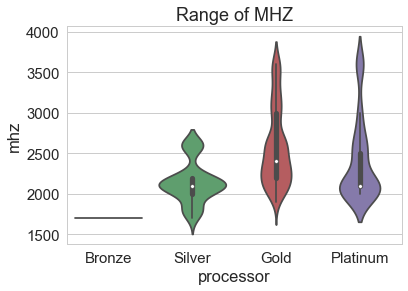

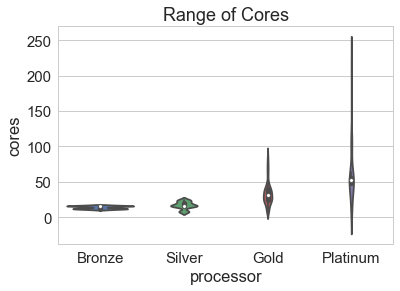

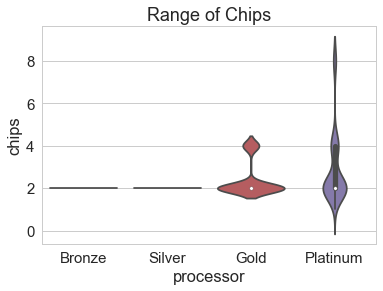

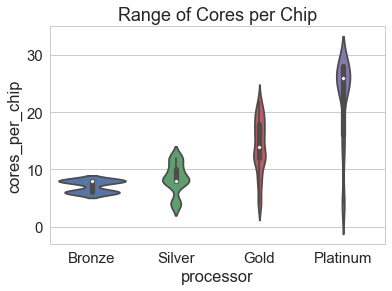

In [92]:
# sns.violinplot(x='processor', y='mhz', data=graph)

# plt.show()

sns.set_style("whitegrid")

sns.violinplot(x="processor", y="mhz", data=graph)
plt.title('Range of MHZ')
plt.savefig('mhz.jpeg')
plt.show()

sns.violinplot(x="processor", y="cores", data=graph)
plt.title('Range of Cores')
plt.savefig('cores.jpeg')
plt.show()

sns.violinplot(x="processor", y="chips", data=graph)
plt.title('Range of Chips')
plt.savefig('chips.jpeg')
plt.show()

sns.violinplot(x="processor", y="cores_per_chip", data=graph)
plt.title('Range of Cores per Chip')
plt.savefig('cores_per_chip.jpeg')
plt.show()


### BAR GRAPH ( Hardware Vendor count )

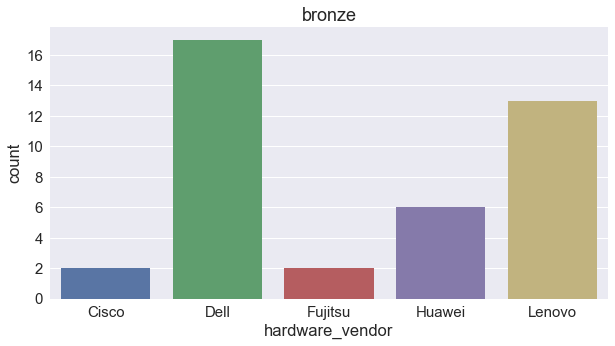

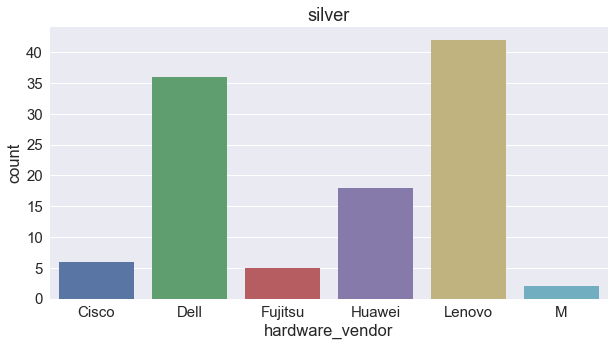

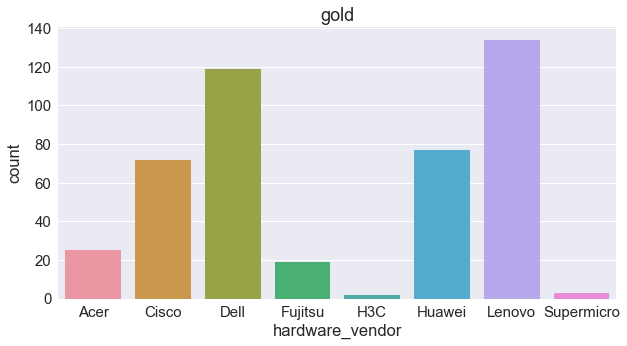

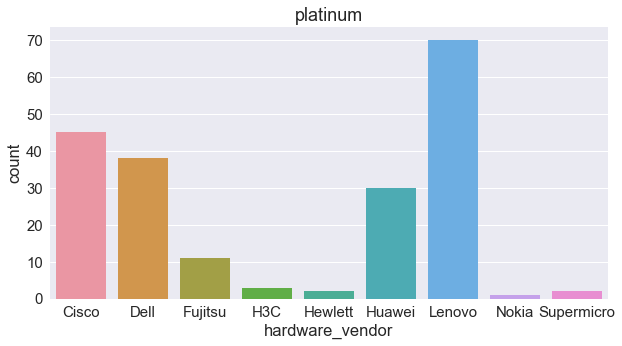

In [93]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(10,5))
sns.countplot(x='hardware_vendor',data=dfb)
plt.title('bronze')
plt.show()

plt.subplots(figsize=(10,5))
sns.countplot(x='hardware_vendor',data=dfs)

plt.title('silver')
plt.show()

plt.subplots(figsize=(10,5))
sns.countplot(x='hardware_vendor',data=dfg)
plt.title('gold')
plt.show()

plt.subplots(figsize=(10,5))
sns.countplot(x='hardware_vendor',data=dfp)
plt.title('platinum')
plt.show()

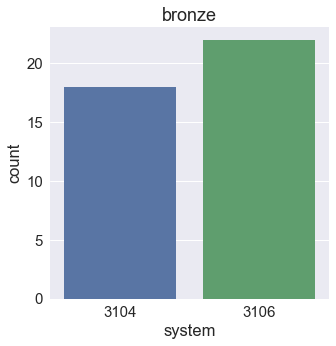

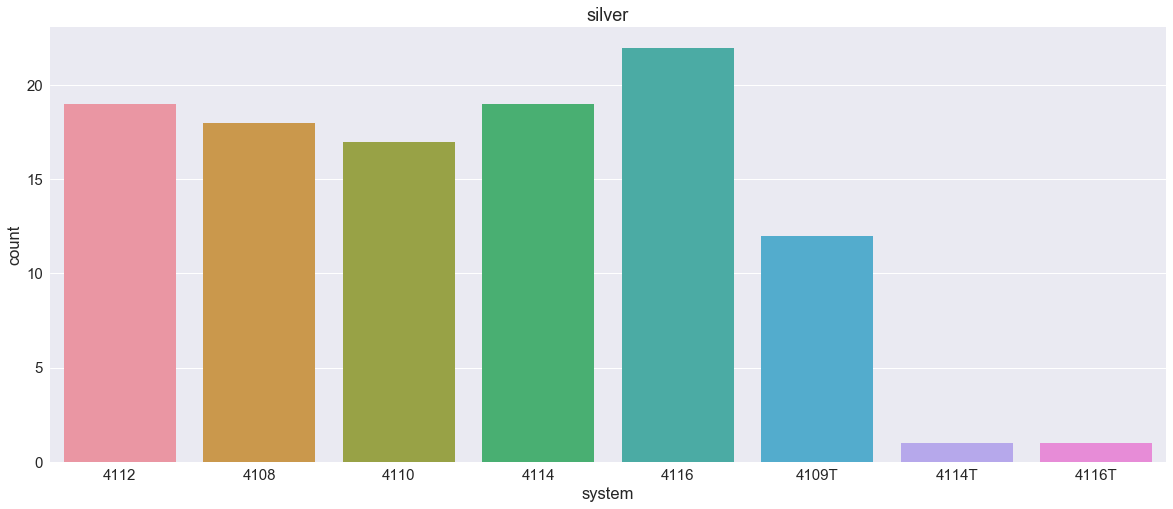

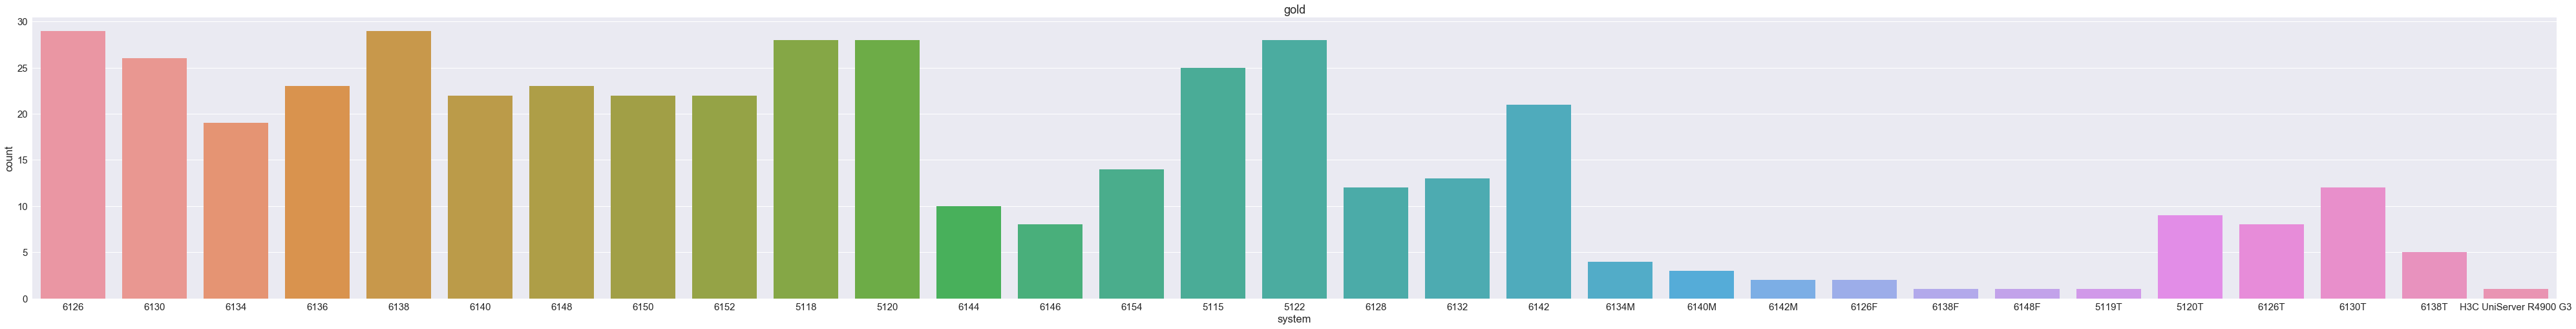

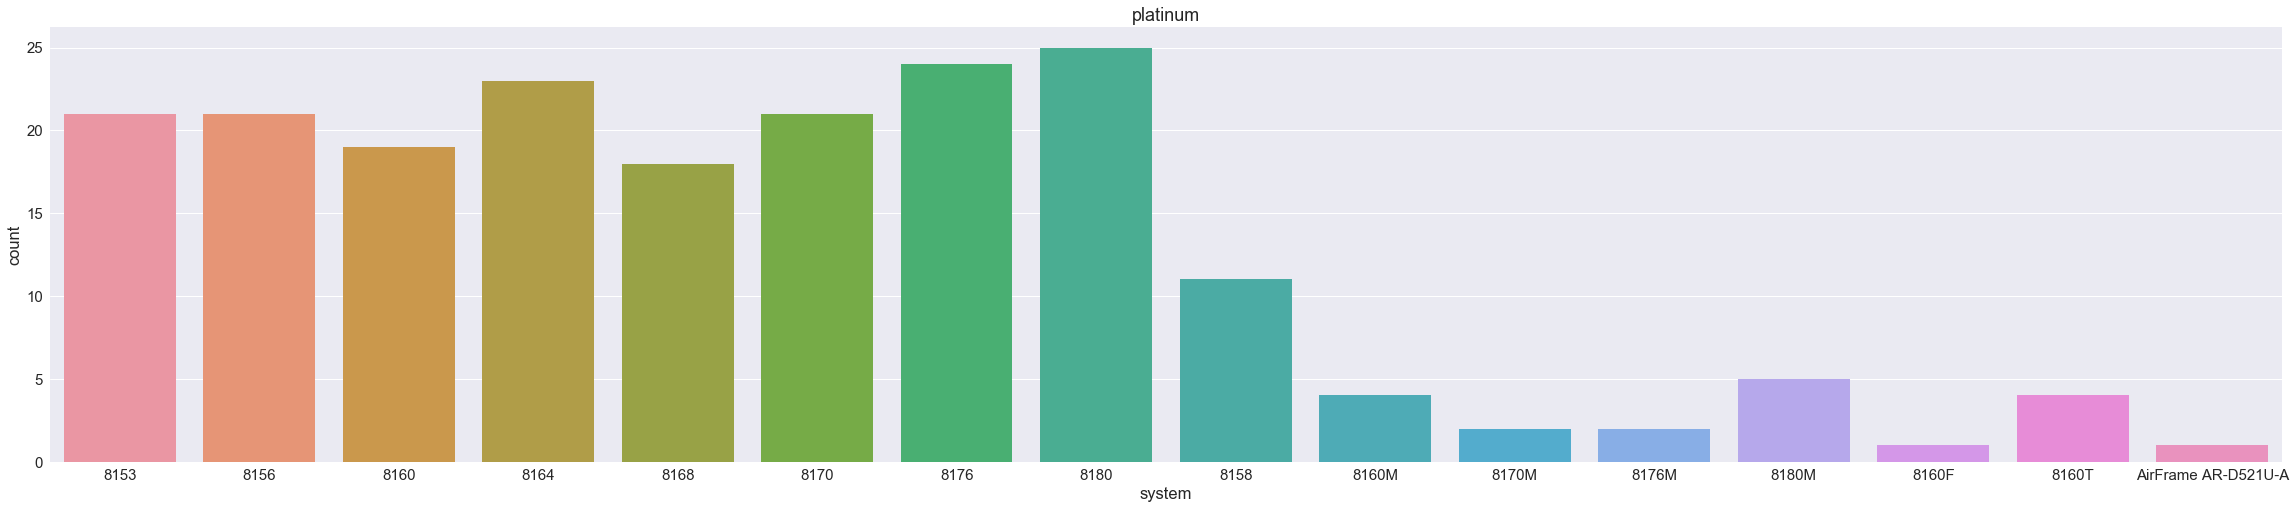

In [94]:
plt.subplots(figsize=(5,5))
sns.countplot(x='system',data=dfb)
plt.title('bronze')
plt.savefig('bronze_series_count.jpeg')
plt.show()


plt.subplots(figsize=(20,8))
sns.countplot(x='system',data=dfs)
plt.title('silver')
plt.savefig('silver_series_count.jpeg')
plt.show()


plt.subplots(figsize=(70,8))
sns.countplot(x='system',data=dfg)
plt.title('gold')
plt.savefig('gold_series_count.pdf')
plt.show()


plt.subplots(figsize=(40,8))
sns.countplot(x='system',data=dfp)
plt.title('platinum')
plt.savefig('platinum_series_count.pdf')
plt.show()



### No of cores

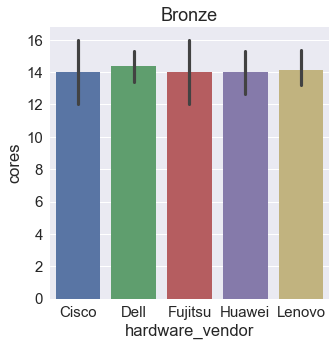

In [95]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores',data=dfb)
plt.title("Bronze")
plt.show()

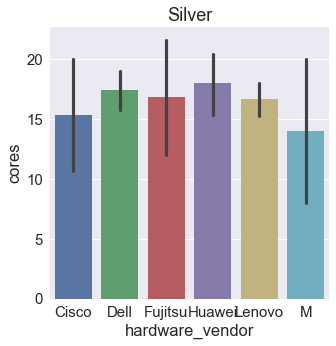

In [96]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores',data=dfs)
plt.title("Silver")
plt.show()

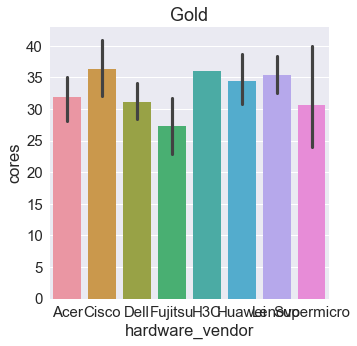

In [97]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores',data=dfg)
plt.title("Gold")
plt.show()

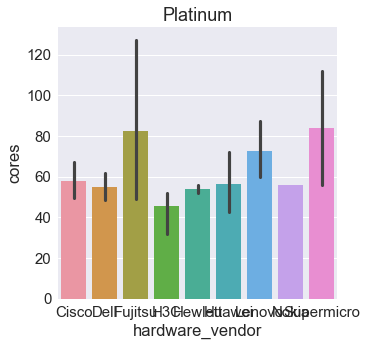

In [98]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores',data=dfp)
plt.title("Platinum")
plt.show()

### No of chips

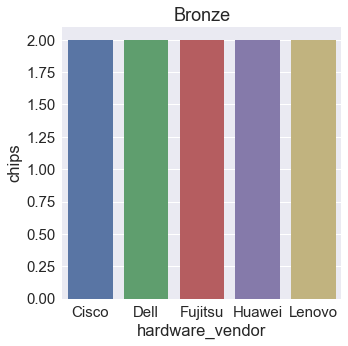

In [99]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='chips',data=dfb)
plt.title("Bronze")
plt.show()

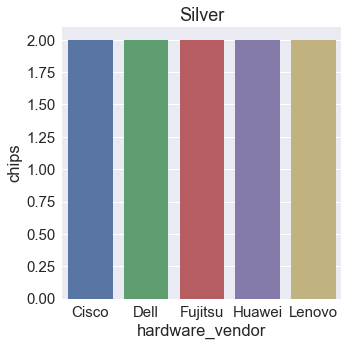

In [100]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='chips',data=dfb)
plt.title("Silver")
plt.show()

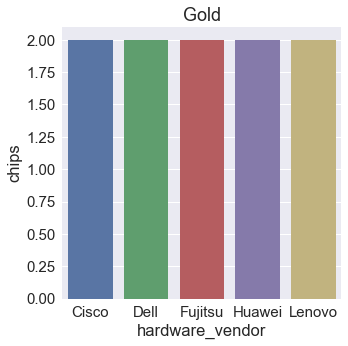

In [101]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='chips',data=dfb)
plt.title("Gold")
plt.show()

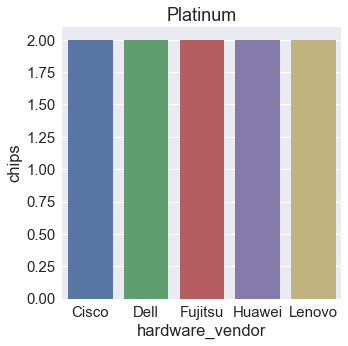

In [102]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='chips',data=dfb)
plt.title("Platinum")
plt.show()

### No of cores per chip

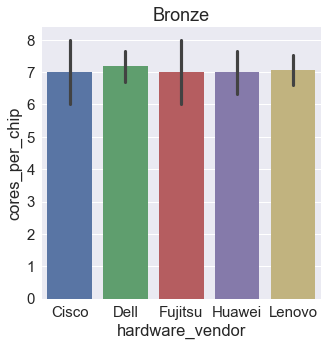

In [103]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores_per_chip',data=dfb)
plt.title("Bronze")
plt.show()

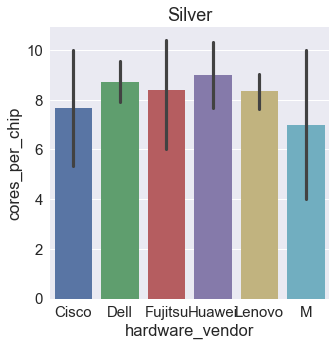

In [104]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores_per_chip',data=dfs)
plt.title("Silver")
plt.show()

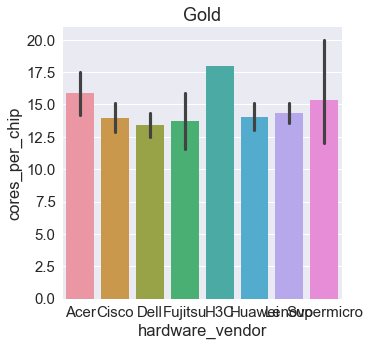

In [105]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores_per_chip',data=dfg)
plt.title("Gold")
plt.show()

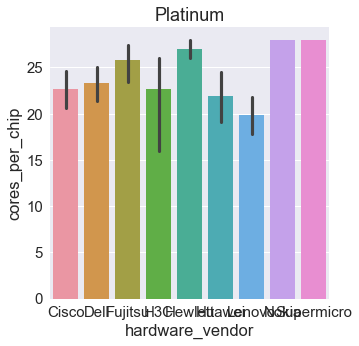

In [106]:
plt.subplots(figsize=(5,5))
sns.barplot(x='hardware_vendor',y='cores_per_chip',data=dfp)
plt.title("Platinum")
plt.show()

### Proceesor series use count

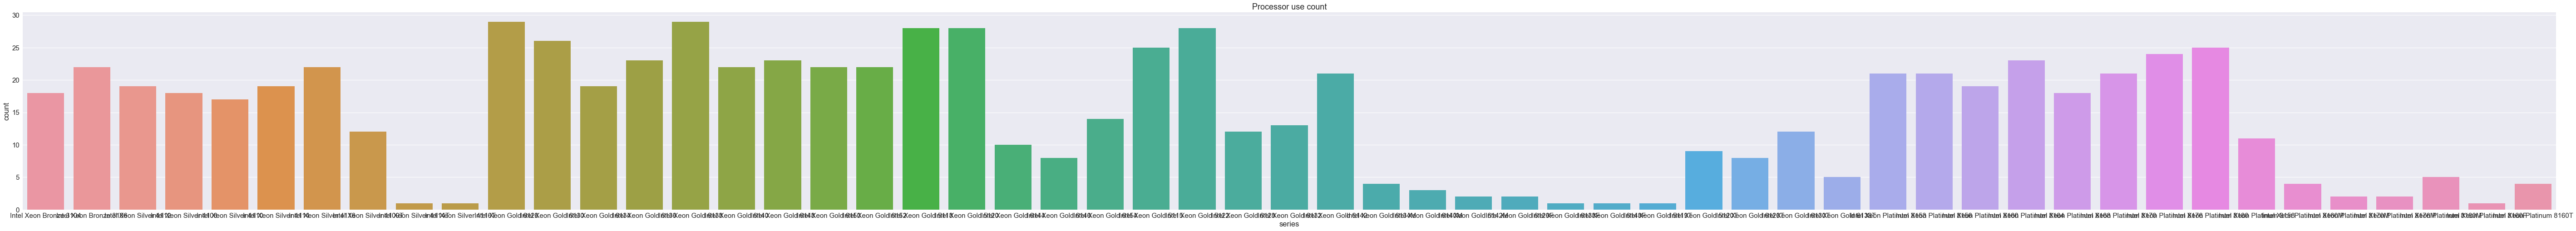

In [107]:
plt.subplots(figsize=(100,8))

sns.countplot(x='series',data=df)
plt.title('Processor use count')
plt.savefig('TOTAL_series_count.PDF')
plt.show()